In [97]:
#import data
import pandas as pd
df = pd.read_csv('Score_Results.csv')

#define search space
epochs = [5, 10, 20, 40, 80]
batches = [64, 128, 256, 512, 1024]
learning_rate = [0.0001, 0.00001]
lambda_weight = [0.2, 0.4, 0.6, 0.8]
loss_function = ["log", "uniform"]

column_names = ['epochs', 'batch_size', 'learning_rate', 'lambda_weight', 'loss_function']
#generate pandas dataframe of all Hyperparameter combinations
df_size = pd.DataFrame(columns=column_names)
i= 0
for epoch in epochs:
    for batch in batches:
        for rates in learning_rate:
            for lb in lambda_weight:
                for loss in loss_function:
                    temp = [epoch, batch, rates, lb, loss]
                    new_row = pd.DataFrame([temp], columns=column_names)
                    df_size = pd.concat([df_size, new_row], ignore_index=True)

df_size.shape                    

C:\Users\lklei\AppData\Local\Temp\ipykernel_13484\3013719118.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_size = pd.concat([df_size, new_row], ignore_index=True)


(400, 5)

## Epoch and Batch Plot

In [98]:
import matplotlib.pyplot as plt
#--prepare data to plot batches and epochs over accuracy and time--
#initilizes arrays to save mean and standart deviation of time annd score values for epochs
bio_avg = []
bat_avg = []
tim_avg = []
bio_std = []
bat_std = []
tim_std = []

#iterate over all epoch values and save average time and scores
for epoch in epochs:    
    df_temp = df[(df["epochs"]== epoch)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    tim_avg.append(df_temp["time"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())
    tim_std.append(df_temp["time"].std())

#save results in pandas data frame    
mean_values_epoch = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'tim_avg': tim_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        'tim_std': tim_std
        })

#reinitilizes arrays to save mean and standart deviation of time annd score values for batches
bio_avg = []
bat_avg = []
tim_avg = []
bio_std = []
bat_std = []
tim_std = []
#iterate over all batch values and save average time and scores
for batch in batches:  
    df_temp = df[(df["batch_size"]== batch)] 
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    tim_avg.append(df_temp["time"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())
    tim_std.append(df_temp["time"].std())

#save results in pandas data frame    
mean_values_batch = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'tim_avg': tim_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        'tim_std': tim_std
        })

mean_values_epoch

,bio_avg,bat_avg,tim_avg,bio_std,bat_std,tim_std
0,0.614211,0.661372,205.454623,0.006816,0.038755,53.834148
1,0.621239,0.671650,283.377538,0.009174,0.040423,103.407468
2,0.640783,0.685640,619.636928,0.009008,0.032965,204.146918
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
mean_values_batch

,bio_avg,bat_avg,tim_avg,bio_std,bat_std,tim_std
0,0.628152,0.698954,554.398156,0.015819,0.048480,232.792355
1,0.622411,0.675329,370.104148,0.012949,0.040712,134.155164
2,0.620383,0.660823,258.349829,0.015151,0.028470,70.182303
3,0.620039,0.659145,191.738090,0.007825,0.027822,23.908819
4,0.618847,0.658815,181.611413,0.006659,0.029131,17.089196


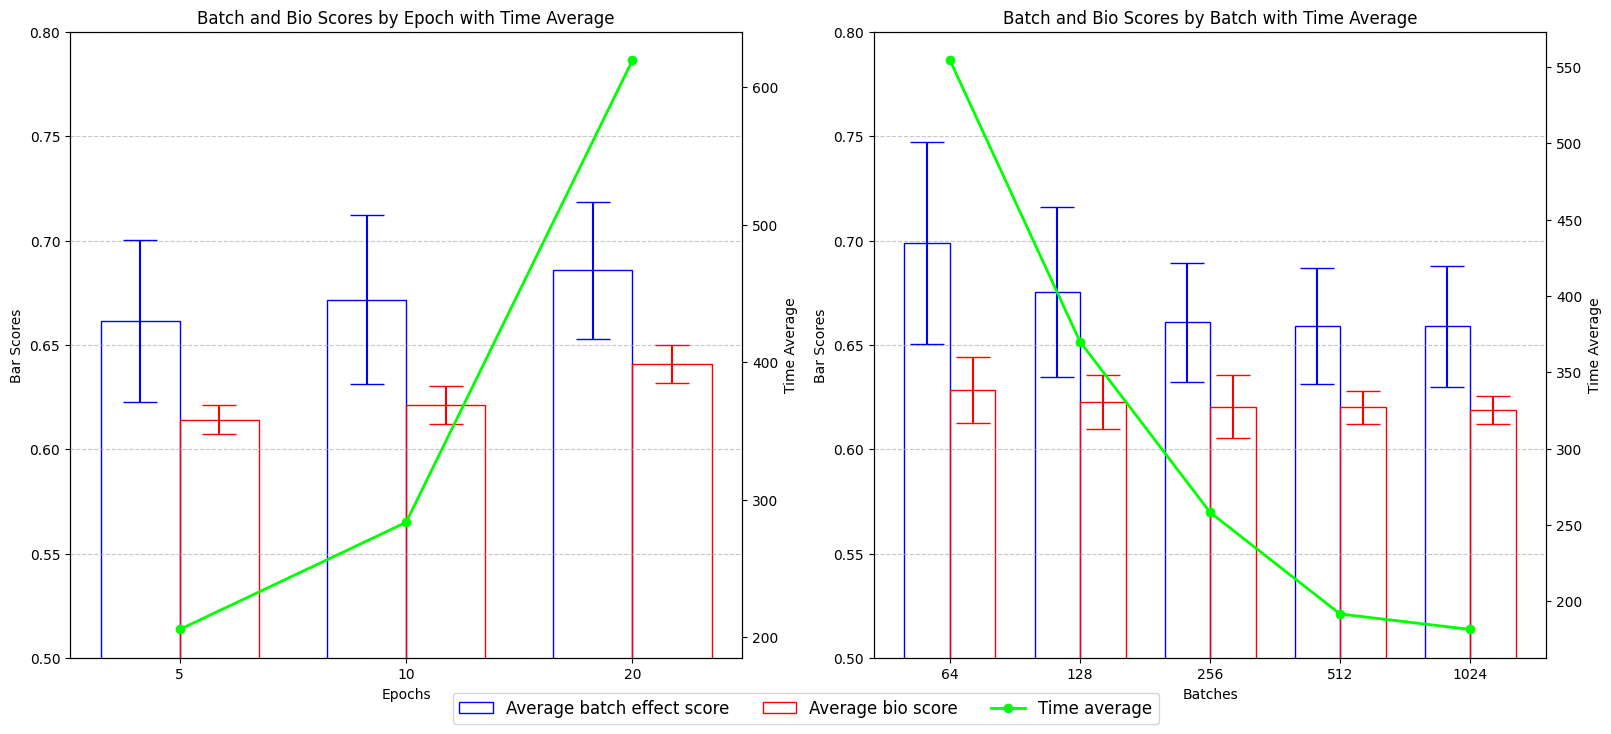

In [103]:
import numpy as np
# Set up color scheme to be consistent across both plots
colors = [(0, 0, 1, 1), (1, 0, 0, 1), (0, 1, 0, 1), (1, 0, 1, 1)]
width = 0.35  # the width of the bars

# Create figure with 2 subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)

# FIRST SUBPLOT: Epoch data
# -----------------------
x_epoch = np.arange(len(epochs))

# First bar chart (batch effect score)
rects1 = ax1.bar(x_epoch - width/2,
            height=mean_values_epoch["bat_avg"],
            yerr=mean_values_epoch["bat_std"],
            capsize=12,
            width=width,
            label='Average batch effect score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[0],
            ecolor=colors[0]  # using the same color for error bars
            )

# Second bar chart (bio score)
rects2 = ax1.bar(x_epoch + width/2,
            height=mean_values_epoch["bio_avg"],
            yerr=mean_values_epoch["bio_std"],
            capsize=12,
            width=width,
            label='Average bio score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[1],
            ecolor=colors[1]  # using the same color for error bars
            )

# Set up labels for primary y-axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Bar Scores')
ax1.set_ylim(0.5, 0.8)
ax1.set_title('Batch and Bio Scores by Epoch with Time Average')
ax1.set_xticks(x_epoch)
ax1.set_xticklabels(epochs)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for the line plot
ax2 = ax1.twinx()

# Line plot (time average)
line1 = ax2.plot(x_epoch, mean_values_epoch["tim_avg"], color=colors[2], marker='o', 
               linestyle='-', linewidth=2, label='Time average')
ax2.set_ylabel('Time Average')

# Combine legends from both axes for first subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# SECOND SUBPLOT: Batch data
# ------------------------
x_batch = np.arange(len(batches))

# First bar chart (batch effect score)
rects3 = ax3.bar(x_batch - width/2,
            height=mean_values_batch["bat_avg"],
            yerr=mean_values_batch["bat_std"],
            capsize=12,
            width=width,
            label='Average batch effect score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[0],
            ecolor=colors[0]  # using the same color for error bars
            )

# Second bar chart (bio score)
rects4 = ax3.bar(x_batch + width/2,
            height=mean_values_batch["bio_avg"],
            yerr=mean_values_batch["bio_std"],
            capsize=12,
            width=width,
            label='Average bio score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[1],
            ecolor=colors[1]  # using the same color for error bars
            )

# Set up labels for primary y-axis of second subplot
ax3.set_xlabel('Batches')
ax3.set_ylabel('Bar Scores')
ax3.set_ylim(0.5, 0.8)
ax3.set_title('Batch and Bio Scores by Batch with Time Average')
ax3.set_xticks(x_batch)
ax3.set_xticklabels(batches)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for the line plot in second subplot
ax4 = ax3.twinx()

# Line plot (time average)
line2 = ax4.plot(x_batch, mean_values_batch["tim_avg"], color=colors[2], marker='o', 
               linestyle='-', linewidth=2, label='Time average')
ax4.set_ylabel('Time Average')

# Create a single legend for the entire figure
# Pull all handles and labels
all_lines = lines1 + lines2  # We only need one set since both plots use the same labels
all_labels = labels1 + labels2

# Add the legend to the figure rather than to a specific axis
fig.legend(all_lines, all_labels, loc='upper center', bbox_to_anchor=(0.5, 0.03), 
          fontsize=12, frameon=True, ncol=3)

# Add overall title to the figure
#fig.suptitle('Combined Analysis of Batch and Epoch Metrics', fontsize=16, y=0.98)

# Use constrained_layout for automatic spacing (alternative to tight_layout)
# This is already set in the plt.subplots() call

plt.show()

## Learning rate, lambda and loss function

In [101]:
#--prepare data to plot learningrate, lambda and loss function over accuracy and time--
#--learning rate--
#initilizes arrays to save mean and standart deviation of time and score values
bio_avg = []
bat_avg = []
bio_std = []
bat_std = []

#iterate over all epoch values and save average time and scores
for learning in learning_rate:    
    df_temp = df[(df["learning_rate"]== learning)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())

#save results in pandas data frame    
mean_values_learning = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        })

#--lambda--
#initilizes arrays to save mean and standart deviation of time annd score values
bio_avg = []
bat_avg = []
bio_std = []
bat_std = []

#iterate over all epoch values and save average time and scores
for lamba in lambda_weight:    
    df_temp = df[(df["lambda_weight"]== lamba)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())

#save results in pandas data frame    
mean_values_lambda = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        })

#--loss function--
#initilizes arrays to save mean and standart deviation of time annd score values 
bio_avg = []
bat_avg = []
bio_std = []
bat_std = []


#iterate over all epoch values and save average time and scores
for loss in loss_function:    
    df_temp = df[(df["loss_function"] == loss)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())
    print(bio_avg)

#save results in pandas data frame    
mean_values_loss = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        })


[np.float64(0.6223050224097906)]
[np.float64(0.6223050224097906), np.float64(0.6215299191118646)]


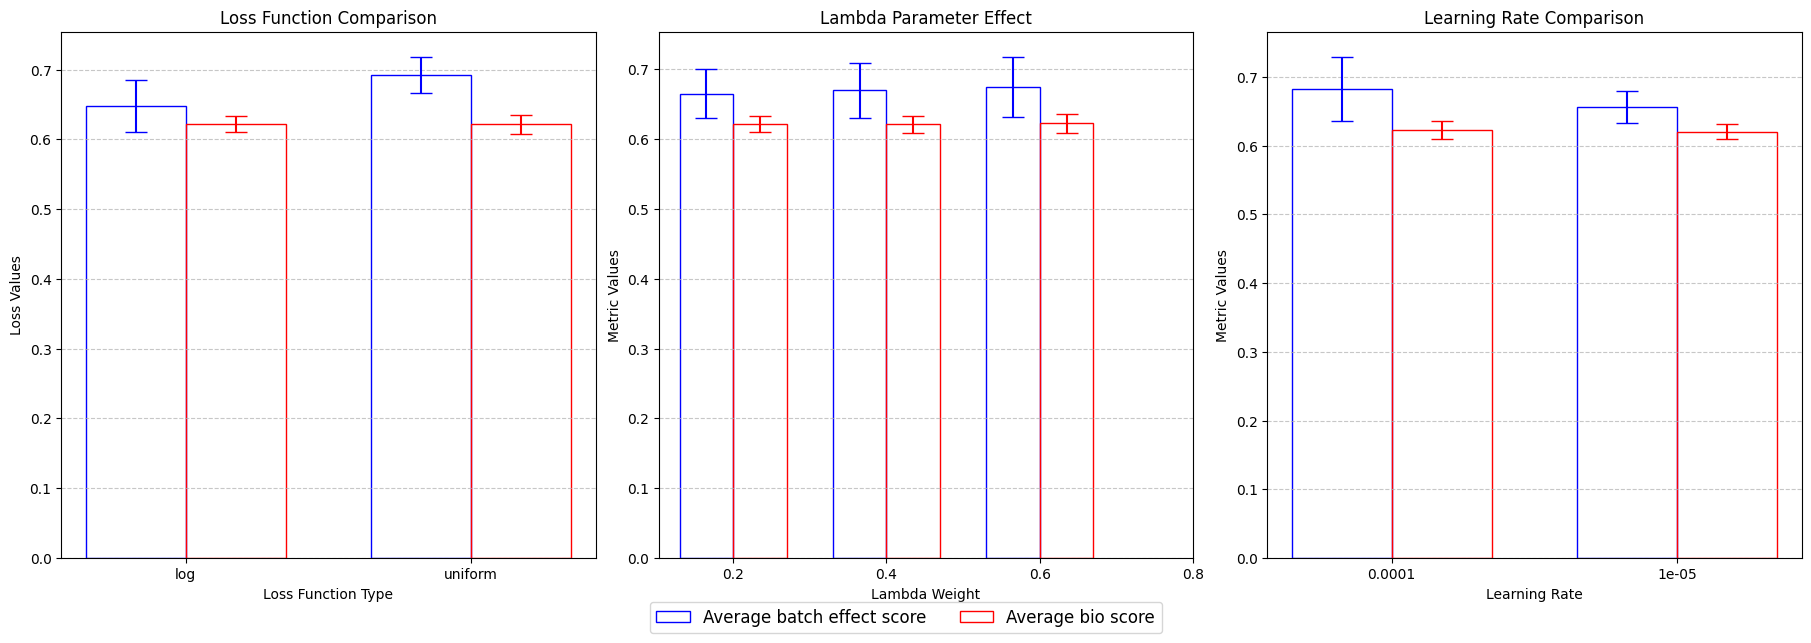

In [102]:
#---Plot effects--
# Set up color scheme to be consistent across all plots
colors = [(0, 0, 1, 1), (1, 0, 0, 1), (0, 1, 0, 1)]
width = 0.35  # the width of the bars

# Create figure with 3 subplots side by side (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Function to create a grouped bar chart with variable x-axis
def create_bar_chart(ax, data, x_values, title, ylabel, xlabel):
    # Generate x positions for the bars
    x = np.arange(len(x_values))
    
    # First bar chart (batch effect score)
    ax.bar(x - width/2,
           height=data["bat_avg"],
           yerr=data["bat_std"],
           capsize=8,
           width=width,
           label='Average batch effect score',
           color=(0, 0, 0, 0),  # transparent fill
           edgecolor=colors[0],
           ecolor=colors[0])
    
    # Second bar chart (bio score)
    ax.bar(x + width/2,
           height=data["bio_avg"],
           yerr=data["bio_std"],
           capsize=8,
           width=width,
           label='Average bio score',
           color=(0, 0, 0, 0),  # transparent fill
           edgecolor=colors[1],
           ecolor=colors[1])
    
    # Set up labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(x_values)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# FIRST SUBPLOT: Loss Function data
create_bar_chart(ax1, mean_values_loss, loss_function, 
                'Loss Function Comparison', 'Loss Values', 'Loss Function Type')

# SECOND SUBPLOT: Lambda Weight data
create_bar_chart(ax2, mean_values_lambda, lambda_weight, 
                'Lambda Parameter Effect', 'Metric Values', 'Lambda Weight')

# THIRD SUBPLOT: Learning Rate data
create_bar_chart(ax3, mean_values_learning, learning_rate, 
                'Learning Rate Comparison', 'Metric Values', 'Learning Rate')


# Create a single legend for the entire figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
          fontsize=12, frameon=True, ncol=2)

# Add overall title to the figure
#fig.suptitle('Effects of Loss Functions, Lambda Weights, and Learning Rates', fontsize=16, y=0.98)

plt.show()